# Transformando dados usando Spark

Este notebook transforma dados de pedidos de vendas, convertendo-os do formato CSV para Parquet e dividindo o nome do cliente em dois campos separados

**Definir variáveis**

In [ ]:
import uuid

# Variable for unique folder name
folderName = uuid.uuid4()

**Carregando dados de origem**

Iniciei carregando alguns dados históricos de pedidos de vendas em um dataframe.

In [ ]:
order_details = spark.read.csv('/data/*.csv', header=True, inferSchema=True)

**Transformando a estrutura de dados**

Os dados de origem incluem um campo CustomerName, que contém o nome e o sobrenome do cliente. Modifiquei o dataframe para separar esse campo em campos separados de FirstName e LastName.

In [ ]:
from pyspark.sql.functions import split, col

# Create the new FirstName and LastName fields
transformed_df = order_details.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))

# Remove the CustomerName field
transformed_df = transformed_df.drop("CustomerName")

**Salvando os dados transformados**

Salvei o dataframe transformado no formato Parquet em uma pasta especificada em uma variável (sobrescrevendo os dados se eles já existirem).

In [ ]:
transformed_df.write.mode("overwrite").parquet('/%s' % folderName)
print ("Transformed data saved in %s!" % folderName)

Criei uma consulta para ver o resultado:

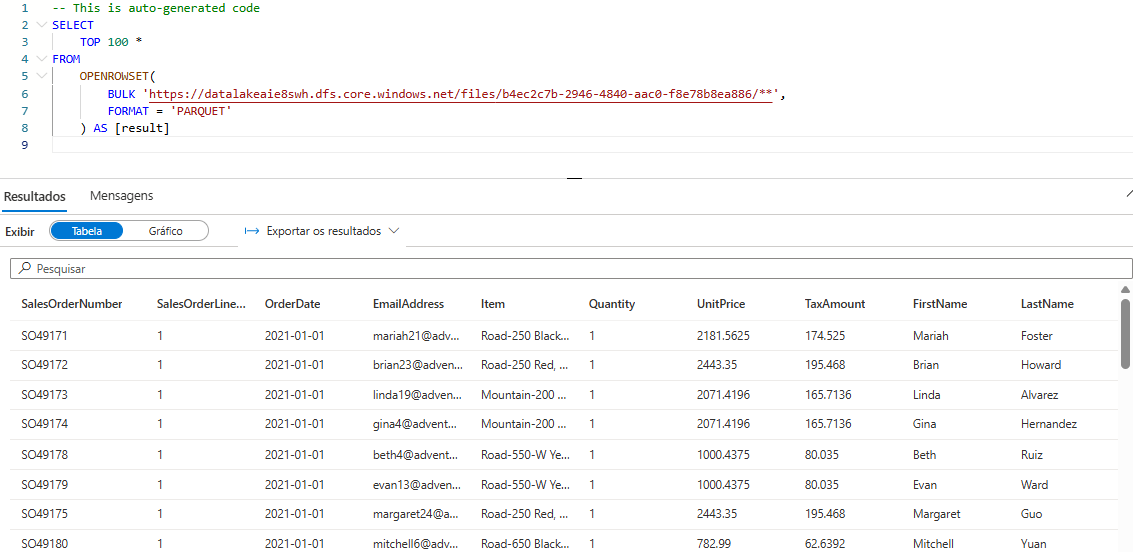

# Execute o notebook em um pipeline

Agora iniciei a automatização, encapsulando o notebook em um pipeline.

Congurei as células do notebook como ativar célula para parâmetro

Criei um pipeline com o nome de "Transformar Dados de Vendas"

Adicionei um notebook com o nome de "Executar transformacao Spark"

Configuração:

Caderno: Este notebook que acabamos de criar acima

Parâmetros de base: Nome = folderName; Tipo = Célula cadeira de caracteres; Valor = @pipeline().RunId

Pool do Spark: nosso pool spark

Tamanho do executor: Small(4 vCores, 28GB de memória)

resultado da configuração:

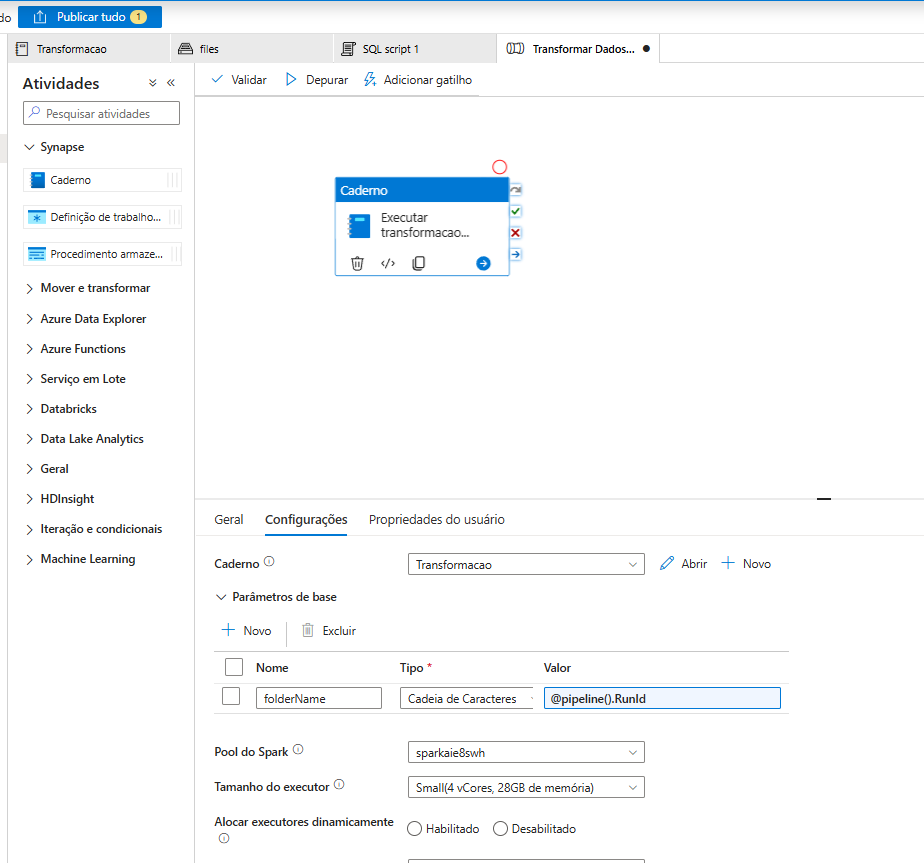

Adicionei um gatilho, esperei a execução.

Em dados visualizei o contêiner de armazenamento de arquivos e verifique se uma nova pasta nomeada para o ID da execução do pipeline foi criada e se ela contém arquivos Parquet para os dados de vendas transformados.

Resultado(sucesso):

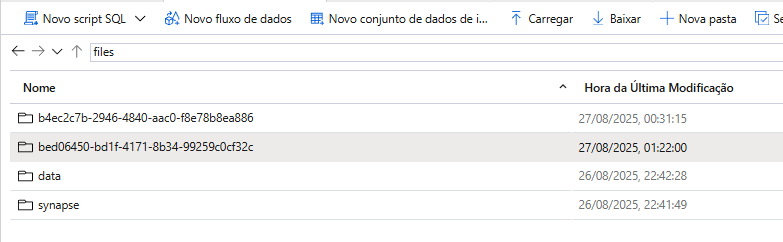

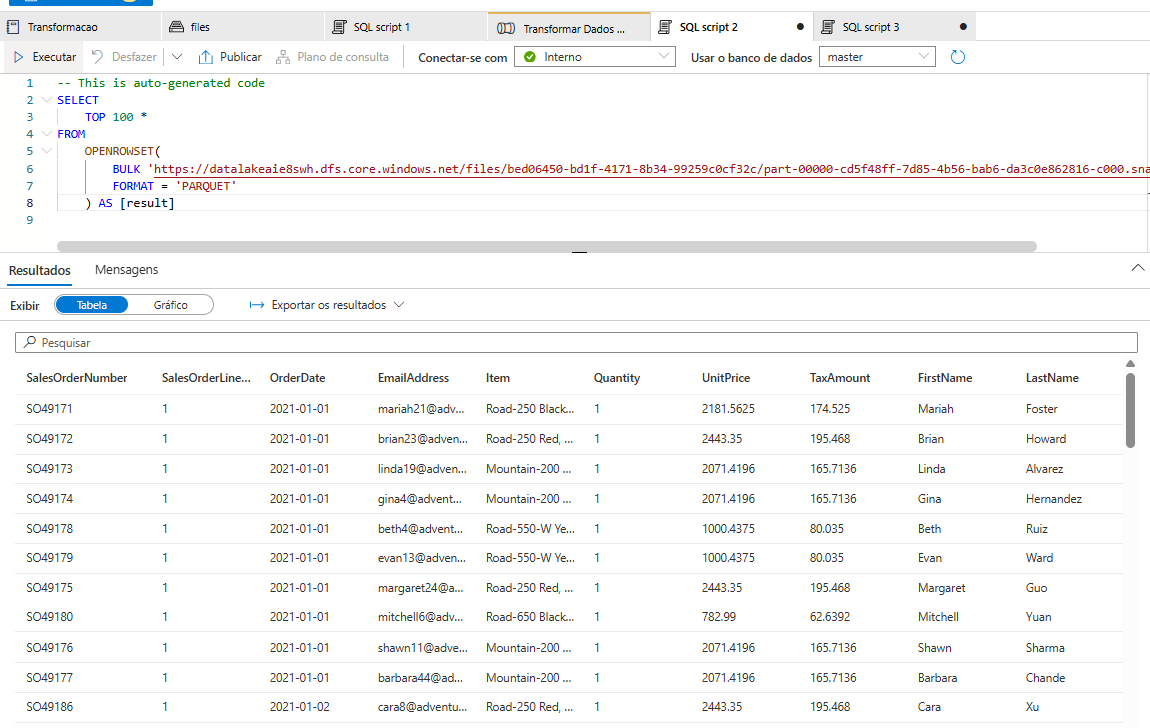